In [1]:
#Import
from codecademySQL import sql_query

In [2]:
#SQL query
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Examine fitness_tests here
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [4]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [5]:
# Examine purchases here
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [6]:
#Save all data in dataframe
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')

In [7]:
#Investigate the A and B groups
#Import
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
#Add column
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:
                                                'A' if pd.notnull(x) else 'B')

In [9]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


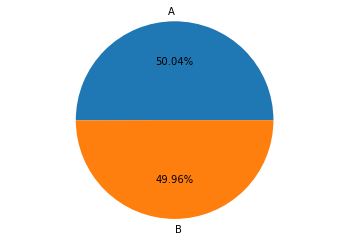

<Figure size 432x288 with 0 Axes>

In [10]:
plt.pie(ab_counts.first_name.values, labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()
plt.savefig('ab_test_pie_chart.png')

In [11]:
#Who picks up an application?
df['is_application'] = df.application_date.apply(lambda x: 'Application'
                                                  if pd.notnull(x) else 'No Application')
app_counts = df.groupby(['ab_test_group', 'is_application'])\
               .first_name.count().reset_index()
app_counts


,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


In [12]:
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group',
                            values='first_name')\
            .reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [13]:
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']

In [14]:
labels = []
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total
labels.append(app_pivot['Percent with Application'])
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


In [15]:
#Hypothesis test
from scipy.stats import chi2_contingency

contingency = [[250, 2254], [325, 2175]]
_, pval, _, _= chi2_contingency(contingency)
print(pval, '-> = < 0.05 -> is significant')

0.0009647827600722304 -> = < 0.05 -> is significant


In [16]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')
just_apps = df[df.is_application == 'Application']
member_count = just_apps.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
member_count

,ab_test_group,is_member,first_name
0,A,Member,200
1,A,Not Member,50
2,B,Member,250
3,B,Not Member,75


In [17]:

member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
labels.append(member_pivot['Percent Purchase'])
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


In [18]:
#Signifinance test
contingency = [[200, 50], [250, 75]]
_, pval, _, _= chi2_contingency(contingency)
print(pval, '-> = > 0.05 -> is not significant')

0.43258646051083327 -> = > 0.05 -> is not significant


In [19]:
final_member_count = df.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
labels.append(final_member_pivot['Percent Purchase'] )
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


In [20]:
#Signifinance test
contingency = [[200, 2304], [250, 2250]]
_, pval, _, _= chi2_contingency(contingency)
print(pval, '-> = < 0.05 -> is significant')

0.014724114645783203 -> = < 0.05 -> is significant


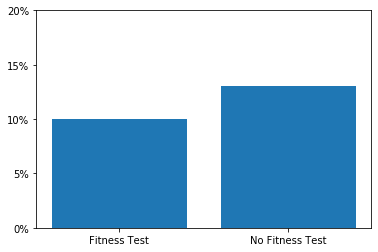

<Figure size 432x288 with 0 Axes>

In [21]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_apply.png')

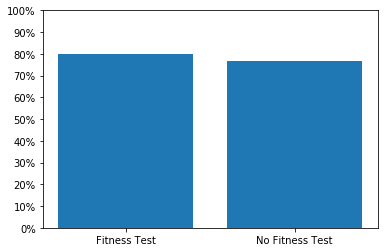

<Figure size 432x288 with 0 Axes>

In [22]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
plt.savefig('percent_apply_purchase.png')

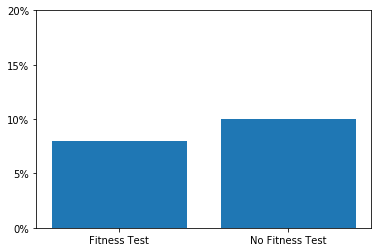

<Figure size 432x288 with 0 Axes>

In [23]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_purchase.png')

[0    0.09984
1    0.13000
Name: Percent with Application, dtype: float64, 0    0.800000
1    0.769231
Name: Percent Purchase, dtype: float64, 0    0.079872
1    0.100000
Name: Percent Purchase, dtype: float64]


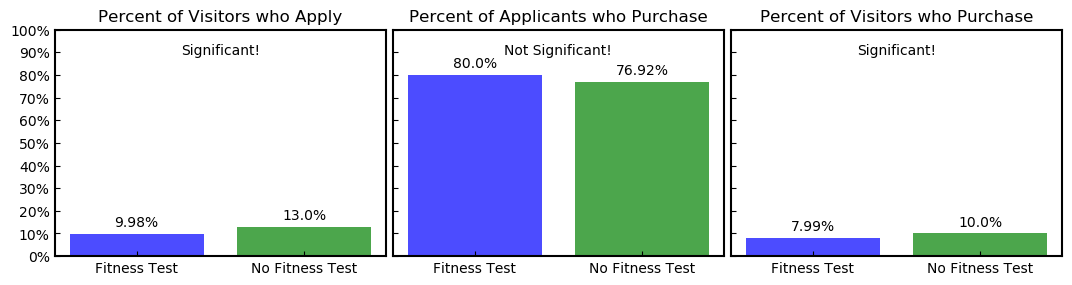

In [44]:
#Overviewplot
#Overview plot
import matplotlib
matplotlib.rcParams.update({'xtick.direction': 'in', 'ytick.direction': 'in',
                            'axes.linewidth': 1.5, })
fig = plt.figure(figsize=(13, 3), dpi=100)
plt.subplots_adjust(hspace=.2, wspace=0.02)
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

a= 0.7

#0
ax0.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values, color=["blue", "green"], alpha=a)
ax0.set_title('Percent of Visitors who Apply')
ax0.set_ylim([0,1])
ax0.set_xticks(range(len(app_pivot)))
ax0.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax0.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
ax0.text(0.5, 0.88,"Significant!",
                ha='center', va='bottom')

#1
ax1.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values, color=["blue", "green"], alpha=a)
ax1.set_title("Percent of Applicants who Purchase")
ax1.set_ylim([0,1])
ax1.set_xticks(range(len(app_pivot)))
ax1.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax1.set_yticklabels([])
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax1.text(0.5, 0.88,"Not Significant!",
                ha='center', va='bottom')

#2
ax2.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values, color=["blue", "green"], alpha=a)
ax2.set_title("Percent of Visitors who Purchase")
ax2.set_ylim([0,1])
ax2.set_xticks(range(len(app_pivot)))
ax2.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax2.set_yticklabels([])
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax2.text(0.5, 0.88,"Significant!",
                ha='center', va='bottom')

print(labels)

#Annotate
axis = [ax0, ax1, ax2]
for i in range(len(axis)):
    rects = axis[i].patches
    for rect, label in zip(rects, labels[i]):
        height = rect.get_height()
        axis[i].text(rect.get_x() + rect.get_width() / 2, height+0.02 , str(round(label*100,2))+"%",
                ha='center', va='bottom')